<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB12.%20Classifyng%20Cancer%20cells%20with%20YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install -q kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [4]:
%mkdir -p ~/.kaggle
%cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~

total 80
drwx------ 1 root root 4096 Jul 22 12:08 .
drwxr-xr-x 1 root root 4096 Jul 22 12:01 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Jul 18 13:39 .cache
drwxr-xr-x 1 root root 4096 Jul 22 12:08 .config
drwxr-xr-x 5 root root 4096 Jul 18 13:39 .ipython
drwx------ 1 root root 4096 Jul 18 13:39 .jupyter
drwxr-xr-x 2 root root 4096 Jul 22 12:05 .kaggle
drwxr-xr-x 2 root root 4096 Jul 22 12:01 .keras
drwx------ 3 root root 4096 Jul 18 13:14 .launchpadlib
drwxr-xr-x 1 root root 4096 Jul 18 13:39 .local
drwxr-xr-x 4 root root 4096 Jul 18 13:39 .npm
drwx------ 3 root root 4096 Jul 22 12:08 .nv
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Jul 18 13:39 .wget-hsts


In [5]:
!kaggle datasets list

ref                                                                 title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                   66KB  2024-06-12 23:09:20          18485        410  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                  496KB  2024-06-15 18:50:51          13889        295  1.0              
dataanalyst001/world-literacy-rate-by-country                       World Literacy Rate by Country                      2KB  2024-07-15 08:28:28            889         22  1.0              
ihelon/coffee-sales                               

In [6]:
!kaggle datasets list -s "blood"

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
paultimothymooney/blood-cells                                Blood Cell Images                           108MB  2018-04-21 21:06:13          42701        839  0.7058824        
whenamancodes/blood-transfusion-dataset                      Blood Transfusion Dataset                     3KB  2022-09-30 04:35:43           4955         68  1.0              
abdallahwagih/retina-blood-vessel                            Retina Blood Vessel                          33MB  2023-08-17 13:35:15           1940         68  0.75             
adhoppin/blood-cell-detection-datatset                       Blood Cell Detection Datatset                12MB  202

In [7]:
!kaggle datasets download -d mohammadamireshraghi/blood-cell-cancer-all-4class --unzip --force

Dataset URL: https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 1.68G/1.68G [01:32<00:00, 23.0MB/s]
100% 1.68G/1.68G [01:32<00:00, 19.5MB/s]


In [8]:
# Install Pip Tree globally

!sudo apt install tree -q


!tree --dirsfirst -L 1  "Blood cell Cancer [ALL]"

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Blood cell Cancer [ALL]
├── Benign
├── [Malignant] early Pre-B
├── [Malignant] Pre-B
└── [Malignant] Pro-B

4 directories, 0 files


In [9]:
!rm -rf "datasets"

In [10]:


import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
original_dataset_dir = 'Blood cell Cancer [ALL]'
base_dir = 'BloodCellCancer'

# Define new paths for train, val, and test
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they do not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List the classes
classes = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B', '[Malignant] Pro-B']

# Function to copy images
def copy_images(class_name, src_dir, train_dst, val_dst, test_dst, train_ratio=0.7, val_ratio=0.15):
    # List all images in the class
    images = os.listdir(src_dir)
    images = [os.path.join(src_dir, img) for img in images if img.endswith('.jpg')]

    # Split into train, val, and test
    train_images, temp_images = train_test_split(images, train_size=train_ratio, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=val_ratio/(val_ratio + (1 - train_ratio)), random_state=42)

    # Create class directories in train, val, and test
    train_class_dir = os.path.join(train_dst, class_name.replace('[Malignant] ', 'Malignant '))
    val_class_dir = os.path.join(val_dst, class_name.replace('[Malignant] ', 'Malignant '))
    test_class_dir = os.path.join(test_dst, class_name.replace('[Malignant] ', 'Malignant '))
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy images
    for img in train_images:
        shutil.copy(img, train_class_dir)

    for img in val_images:
        shutil.copy(img, val_class_dir)

    for img in test_images:
        shutil.copy(img, test_class_dir)

    # Return one image from train, val, and test for display
    return train_images[0], val_images[0], test_images[0]

# Dictionaries to store image paths for each class
train_sample_images = {}
val_sample_images = {}
test_sample_images = {}

# Copy images for each class and get a sample image from each class
for class_name in classes:
    src_dir = os.path.join(original_dataset_dir, class_name)
    train_img, val_img, test_img = copy_images(class_name, src_dir, train_dir, val_dir, test_dir)
    train_sample_images[class_name] = train_img
    val_sample_images[class_name] = val_img
    test_sample_images[class_name] = test_img

print("Dataset reorganized successfully")



Dataset reorganized successfully


In [11]:
!tree --dirsfirst -L 2  "BloodCellCancer"

BloodCellCancer
├── test
│   ├── Benign
│   ├── Malignant early Pre-B
│   ├── Malignant Pre-B
│   └── Malignant Pro-B
├── train
│   ├── Benign
│   ├── Malignant early Pre-B
│   ├── Malignant Pre-B
│   └── Malignant Pro-B
├── val
│   ├── Benign
│   ├── Malignant early Pre-B
│   ├── Malignant Pre-B
│   └── Malignant Pro-B
├── train.cache
└── val.cache

15 directories, 2 files


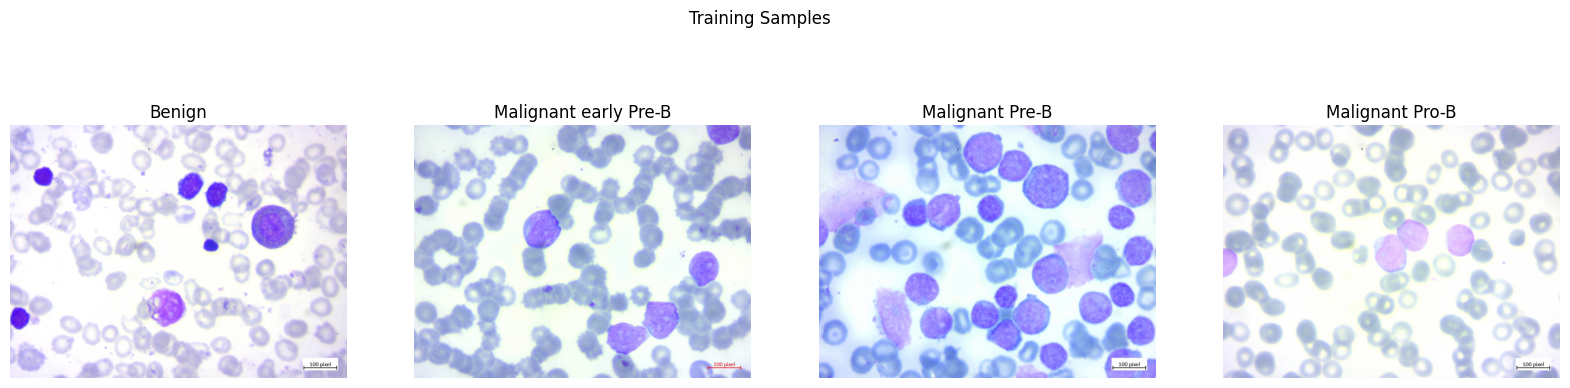

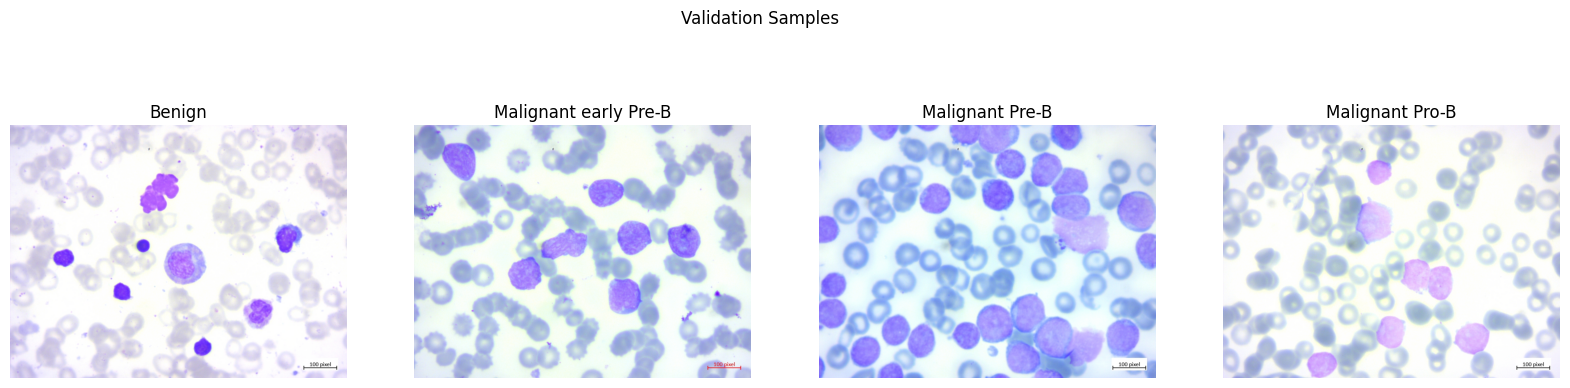

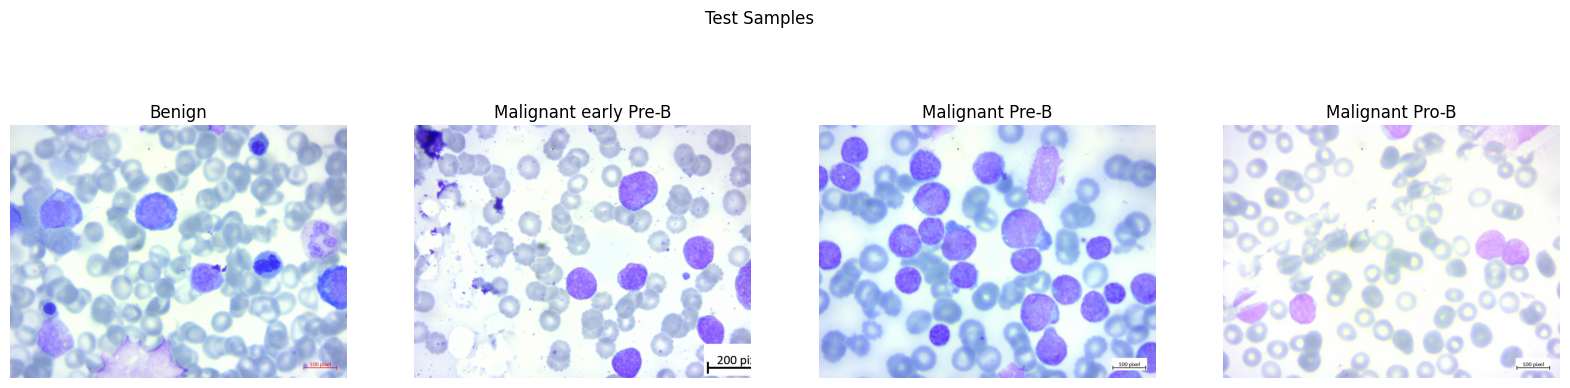

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to show sample images
def show_sample_images(sample_images, title):
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 5))
    fig.suptitle(title)
    for ax, (class_name, img_path) in zip(axes, sample_images.items()):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(class_name.replace('[Malignant] ', 'Malignant '))
        ax.axis('off')

show_sample_images(train_sample_images, 'Training Samples')
plt.show()

show_sample_images(val_sample_images, 'Validation Samples')
plt.show()

show_sample_images(test_sample_images, 'Test Samples')
plt.show()


In [13]:
import yaml

# Contenido del archivo YAML
data = {
    #'path': '../datasets/BloodCellCancer', # Path to the dataset directory
    'train': 'train',
    'val': 'val',
    'test': 'test',
    'names': {
        0: 'Benign',
        1: 'Malignant early Pre-B',
        2: 'Malignant Pre-B',
        3: 'Malignant Pro-B'
    }
}

# Crear y escribir en el archivo blood_cell_cancer.yaml
with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


In [14]:
!pip install -q ultralytics


In [15]:
from ultralytics import YOLO

# Cargar el modelo YOLOv8
model = YOLO('yolov8n-cls.pt')  # Puedes elegir diferentes versiones del modelo, como yolov8n-cls.pt, yolov8s-cls.pt, etc.

# Entrenar el modelo
model.train(data='BloodCellCancer', epochs=10, imgsz=224, batch=16)


Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=BloodCellCancer, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/BloodCellCancer/train... 2268 images, 0 corrupt: 100%|██████████| 2268/2268 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/BloodCellCancer/val... 648 images, 0 corrupt: 100%|██████████| 648/648 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 10 epochs...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:17<00:00,  1.19it/s]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.28it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.38it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.33it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.36it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:14<00:00,  1.46it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.26it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:15<00:00,  1.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.396G    0.06361         12        224: 100%|██████████| 142/142 [01:07<00:00,  2.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:16<00:00,  1.31it/s]

                   all          1          1



10 epochs completed in 0.231 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 3.0MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/BloodCellCancer/train... found 2268 images in 4 classes ✅ 
val: /content/BloodCellCancer/val... found 648 images in 4 classes ✅ 
test: /content/BloodCellCancer/test... found 326 images in 4 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:17<00:00,  1.22it/s]


                   all          1          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd7dc3df310>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.08311426198040997, 'inference': 0.48804356728071047, 'loss': 0.00370799759287893, 'postprocess': 0.00045218585449972274}
task: 'classify'
top1: 1.0
top5: 1.0

In [16]:
# Evaluar el modelo
metrics = model.val()

# Extraer métricas
top1_accuracy = metrics.top1
top5_accuracy = metrics.top5
fitness = metrics.fitness
results_dict = metrics.results_dict

# Imprimir las métricas
print("Metrics:")
print(f"Top-1 Accuracy: {top1_accuracy}")
print(f"Top-5 Accuracy: {top5_accuracy}")
print(f"Fitness: {fitness}")
print(f"Results Dictionary: {results_dict}")
print(f"Confusion Matrix Path: {metrics.save_dir / 'confusion_matrix.png'}")


# Realizar predicciones en nuevas imágenes
results = model('/content/BloodCellCancer/val/Benign/Sap_013 (1).jpg')
print(results)


Ultralytics YOLOv8.2.62 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/BloodCellCancer/train... found 2268 images in 4 classes ✅ 
val: /content/BloodCellCancer/val... found 648 images in 4 classes ✅ 
test: /content/BloodCellCancer/test... found 326 images in 4 classes ✅ 


val: Scanning /content/BloodCellCancer/val... 648 images, 0 corrupt: 100%|██████████| 648/648 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train42
Metrics:
Top-1 Accuracy: 1.0
Top-5 Accuracy: 1.0
Fitness: 1.0
Results Dictionary: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
Confusion Matrix Path: runs/classify/train42/confusion_matrix.png

image 1/1 /content/BloodCellCancer/val/Benign/Sap_013 (1).jpg: 224x224 Benign 1.00, Malignant early Pre-B 0.00, Malignant Pro-B 0.00, Malignant Pre-B 0.00, 4.5ms
Speed: 28.0ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'Benign', 1: 'Malignant Pre-B', 2: 'Malignant Pro-B', 3: 'Malignant early Pre-B'}
obb: None
orig_img: array([[[253, 234, 243],
        [255, 239, 248],
        [255, 238, 247],
        ...,
        [254, 240, 252],
        [255, 245, 253

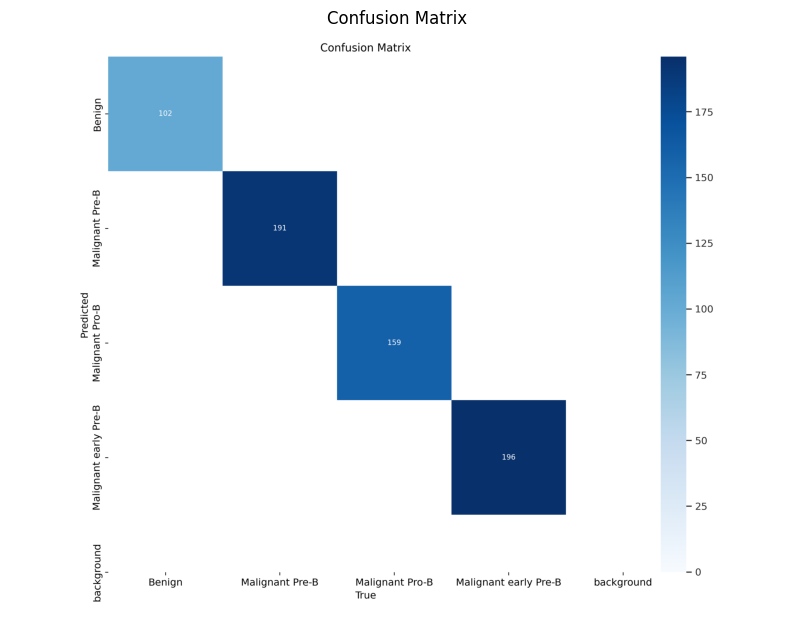

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
confusion_matrix_image = Image.open(f'{metrics.save_dir}/confusion_matrix.png')

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_image)
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()


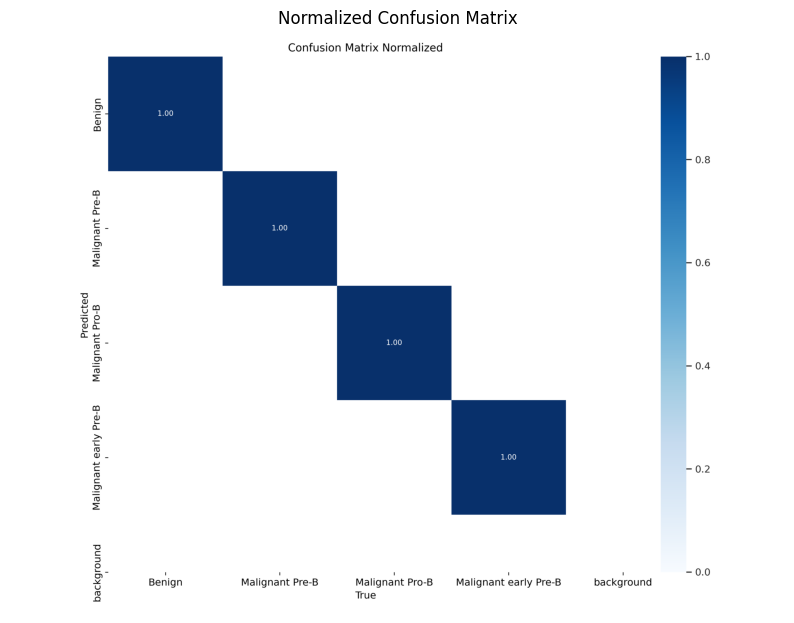

In [18]:

# Load the image
confusion_matrix_normalized_image = Image.open(f'{metrics.save_dir}/confusion_matrix_normalized.png')


# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_normalized_image)
plt.axis('off')
plt.title('Normalized Confusion Matrix')
plt.show()
